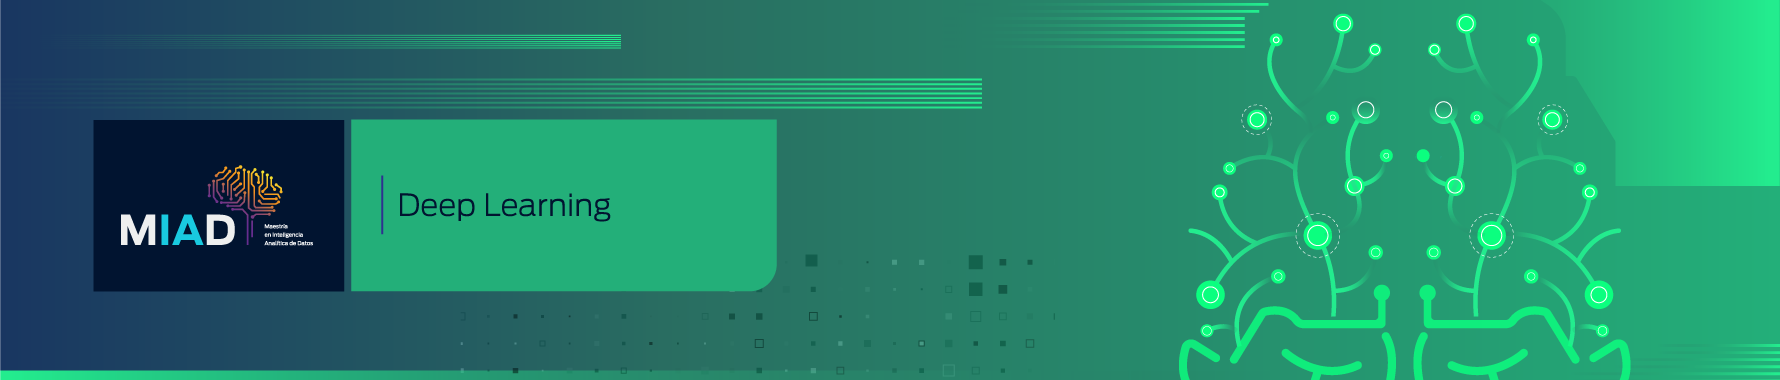

# Estrategias de implementación

## Redes neuronales usando Keras: Implementación en contexto real usando Keras

## Actividad calificada por el personal

### Propósito 

En el laboratorio "Estimación de red neuronal con múltiples capas" se propuso una implementación manual de redes neuronales usando librerías básicas de python como lo son *pandas* y *numpy*. *Google* desarrolló un *API* para el aprendizaje automático cuyo nombre es *"Keras"*, esta es escrita en *python* y es utilizada para hacer implementaciones de redes neuronales simples.

Así, en este *notebook* se pretende evaluar el uso de *keras* al aplicar una red neuronal en un contexto real. 

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios a evaluar

Los criterios que se evaluarán son:

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [30 puntos]

Estimación de un modelo utilizando redes neuronales: Se estima el modelo usando una red neuronal, se evalúa en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado [30 puntos]

Elección del mejor modelo: Se elige la mejor combinación de hiperparámetros de acuerdo a los resultados obtenidos y justifica adecuadamente la selección. [40 puntos]


#### Problema

Un *manager* de un banco manifiesta preocupación porque los clientes están renunciando a las tarjetas de crédito. Este cuenta con los datos disponibles en 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers a cerca de 10000 clientes, si tiene productos activos o no (*"Attrition flag"*), en función de variables tales como edad, salario, estado civil, límite de tarjeta de crédito, categoría de tarjeta de crédito, etc.

Ustedes deben proponer el algoritmo para hacer la clasificación de los clientes con una red neuronal.

Tengan en cuenta que, para resolver los puntos de esta actividad, únicamente deben considerar las variables continuas (se deben eliminar las variables categóricas) y deberán eliminar las observaciones con datos faltantes.


### Librerías a importar

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import exp

import tensorflow as tf
from tensorflow import keras

### 1. Análisis preliminar de variables [30 puntos]

Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [2]:
# Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
df = pd.read_csv("./BankChurners.csv", index_col = 0)
Y = df['Attrition_Flag']
names = list(pd.factorize(df['Attrition_Flag'])[1])
df['Attrition_Flag'] = pd.factorize(df['Attrition_Flag'])[0]
df = df.select_dtypes(include=['int64', 'float64']).copy()
df = df.rename(columns={'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NBAFCC2', 
                        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NBAFCC1'}).copy()
df = df.dropna().copy()
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,NBAFCC1,NBAFCC2
CLIENTNUM,,,,,,,,,,,,,,,,,
768805383,0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
818770008,0,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
713982108,0,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
769911858,0,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
709106358,0,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.160660,0.367235,0.000000,0.000000,0.000000,0.000000,1.00000
Customer_Age,10127.0,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.00000
Dependent_count,10127.0,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.00000
Months_on_book,10127.0,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.00000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.00000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.00000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.00000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.00000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.00000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.00000


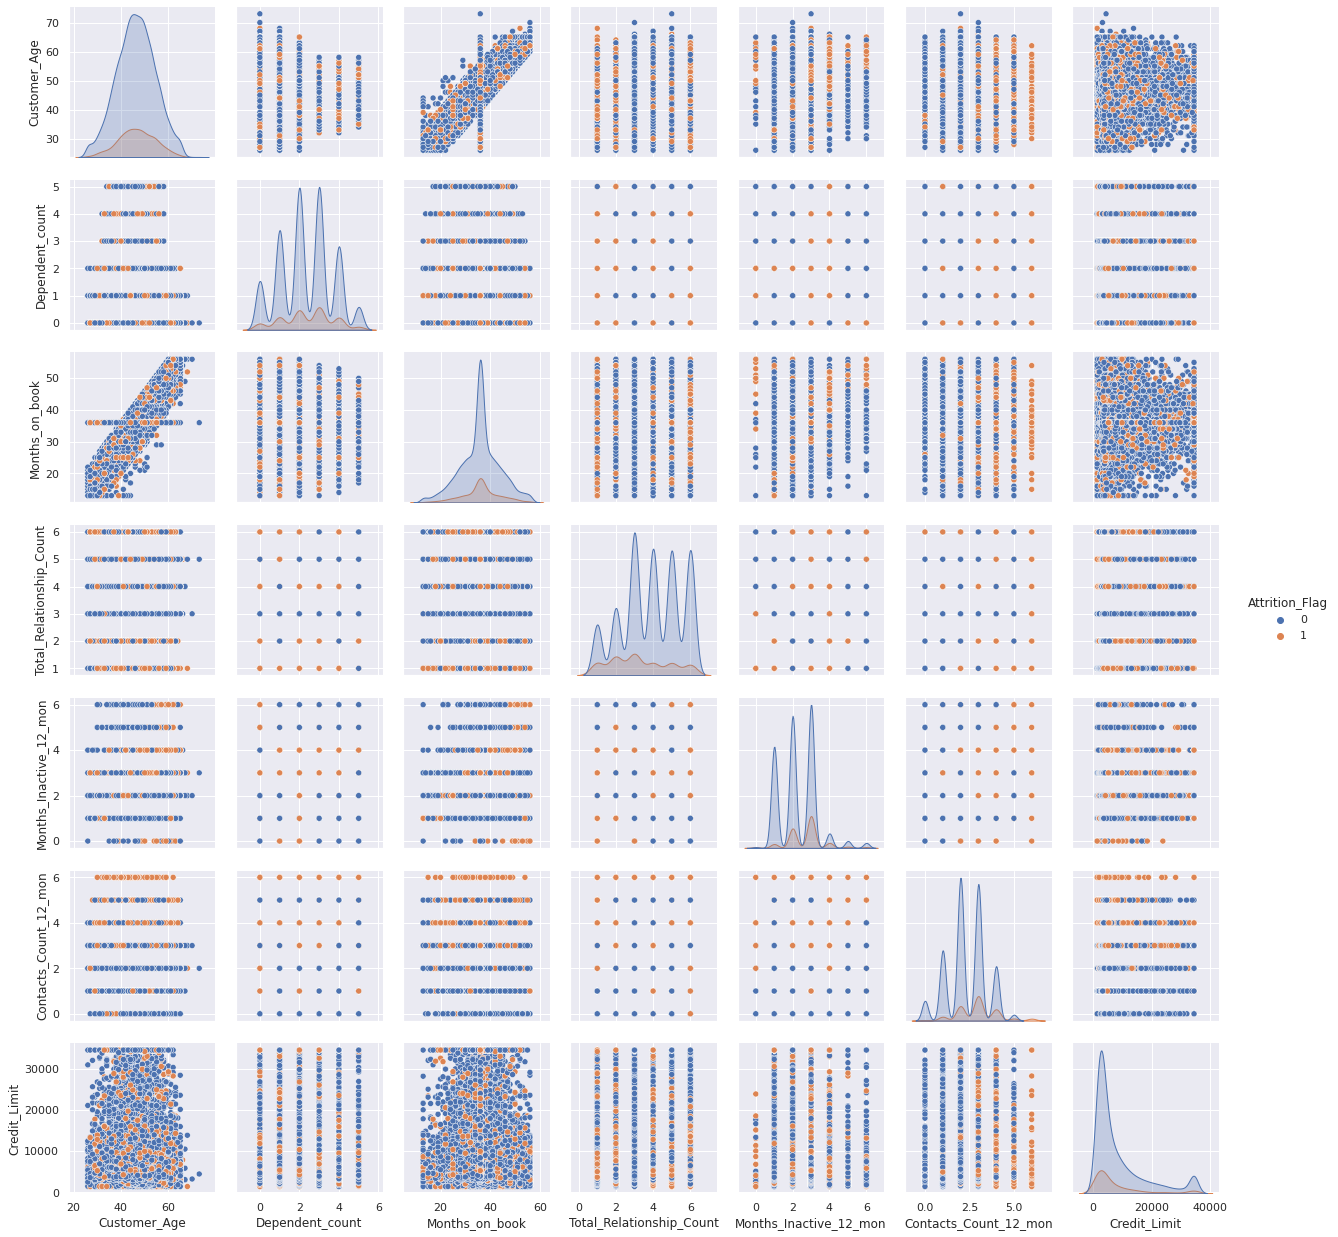

In [4]:
df_plot = df.iloc[:, :int(len(df.columns)/2)]

sns.pairplot(df_plot, hue = 'Attrition_Flag')
plt.show()
plt.close()

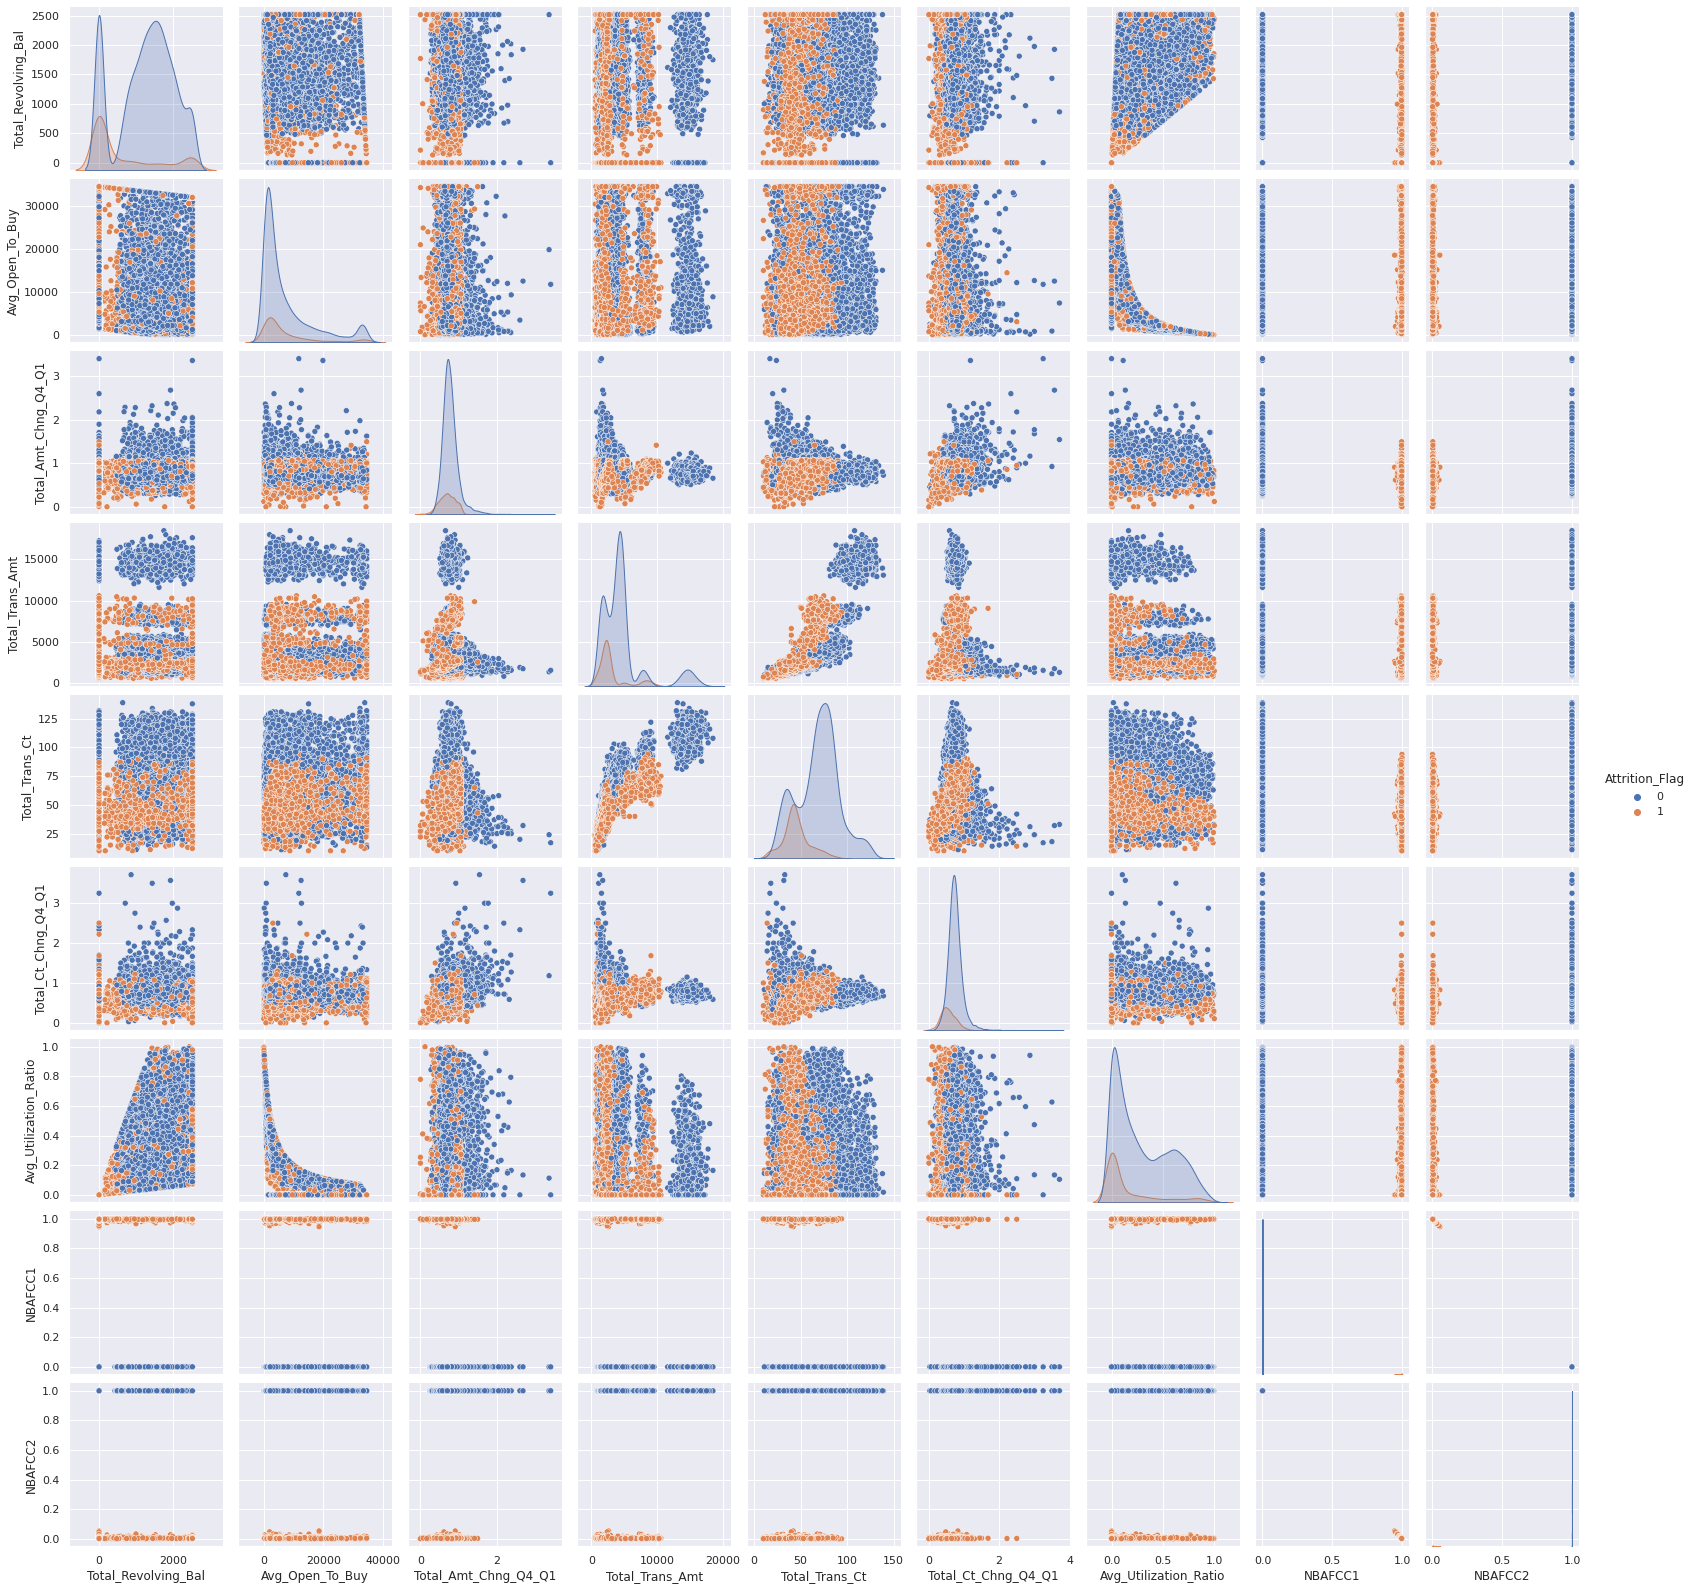

In [5]:
df_plot = df.iloc[:, int(len(df.columns)/2):]
df_plot['Attrition_Flag'] = df['Attrition_Flag'] 
sns.pairplot(df_plot, hue = 'Attrition_Flag')
plt.show()
plt.close()

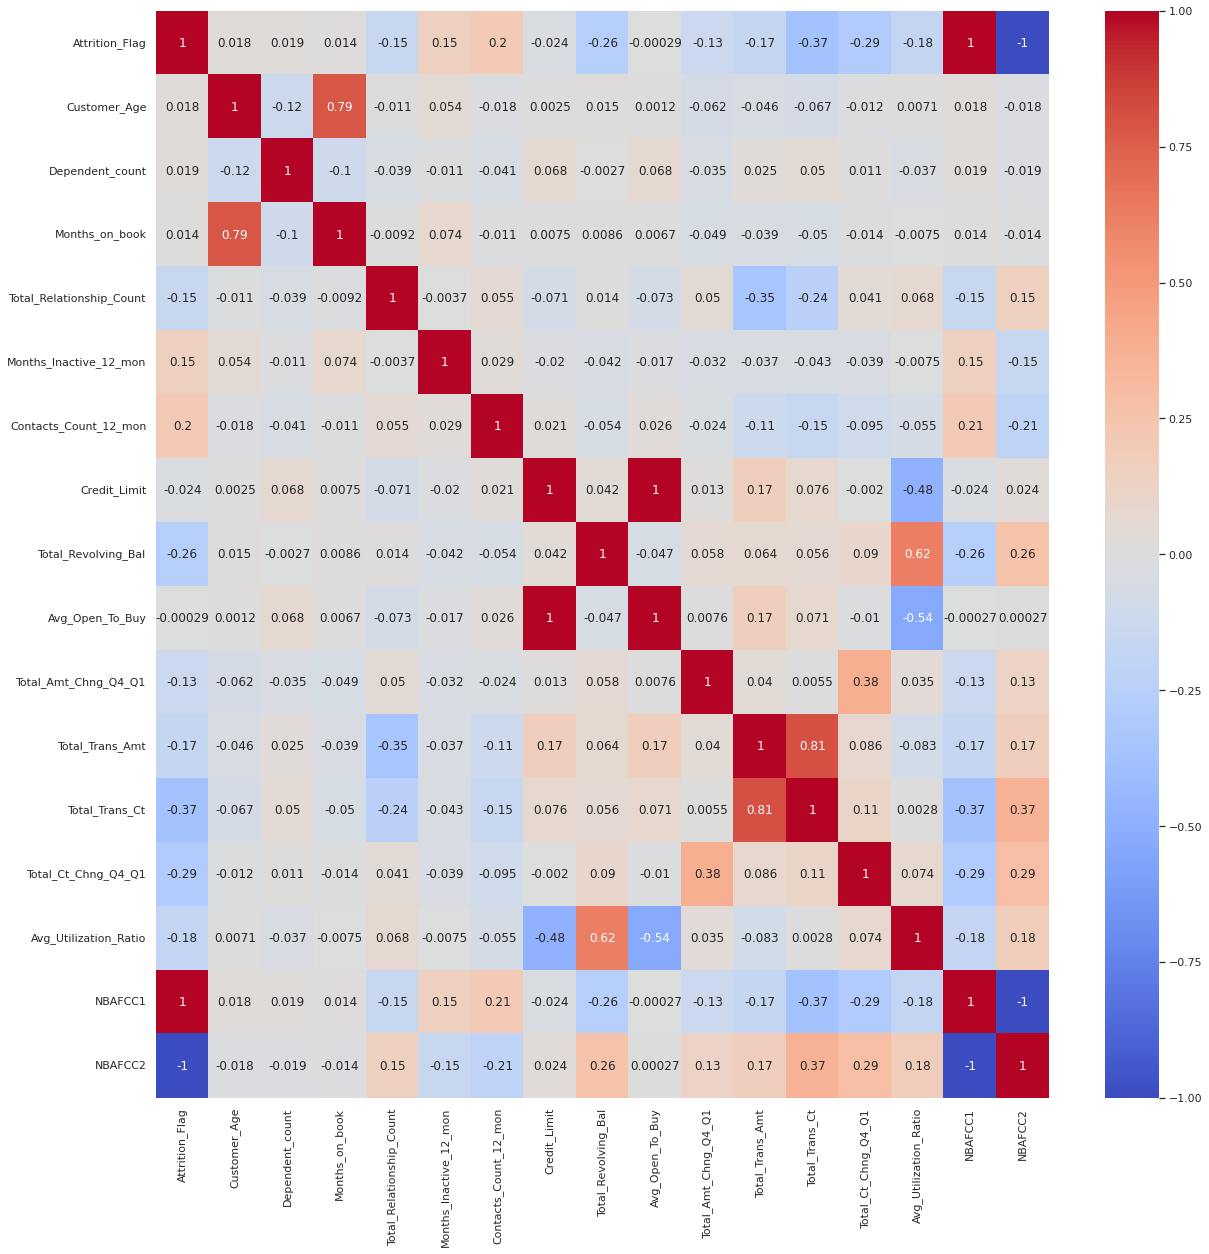

In [6]:
df_plot = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_plot, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm')
plt.show()

In [7]:
df = df.drop(['NBAFCC1', 'NBAFCC2', 'Avg_Open_To_Buy'], axis = 1).copy()

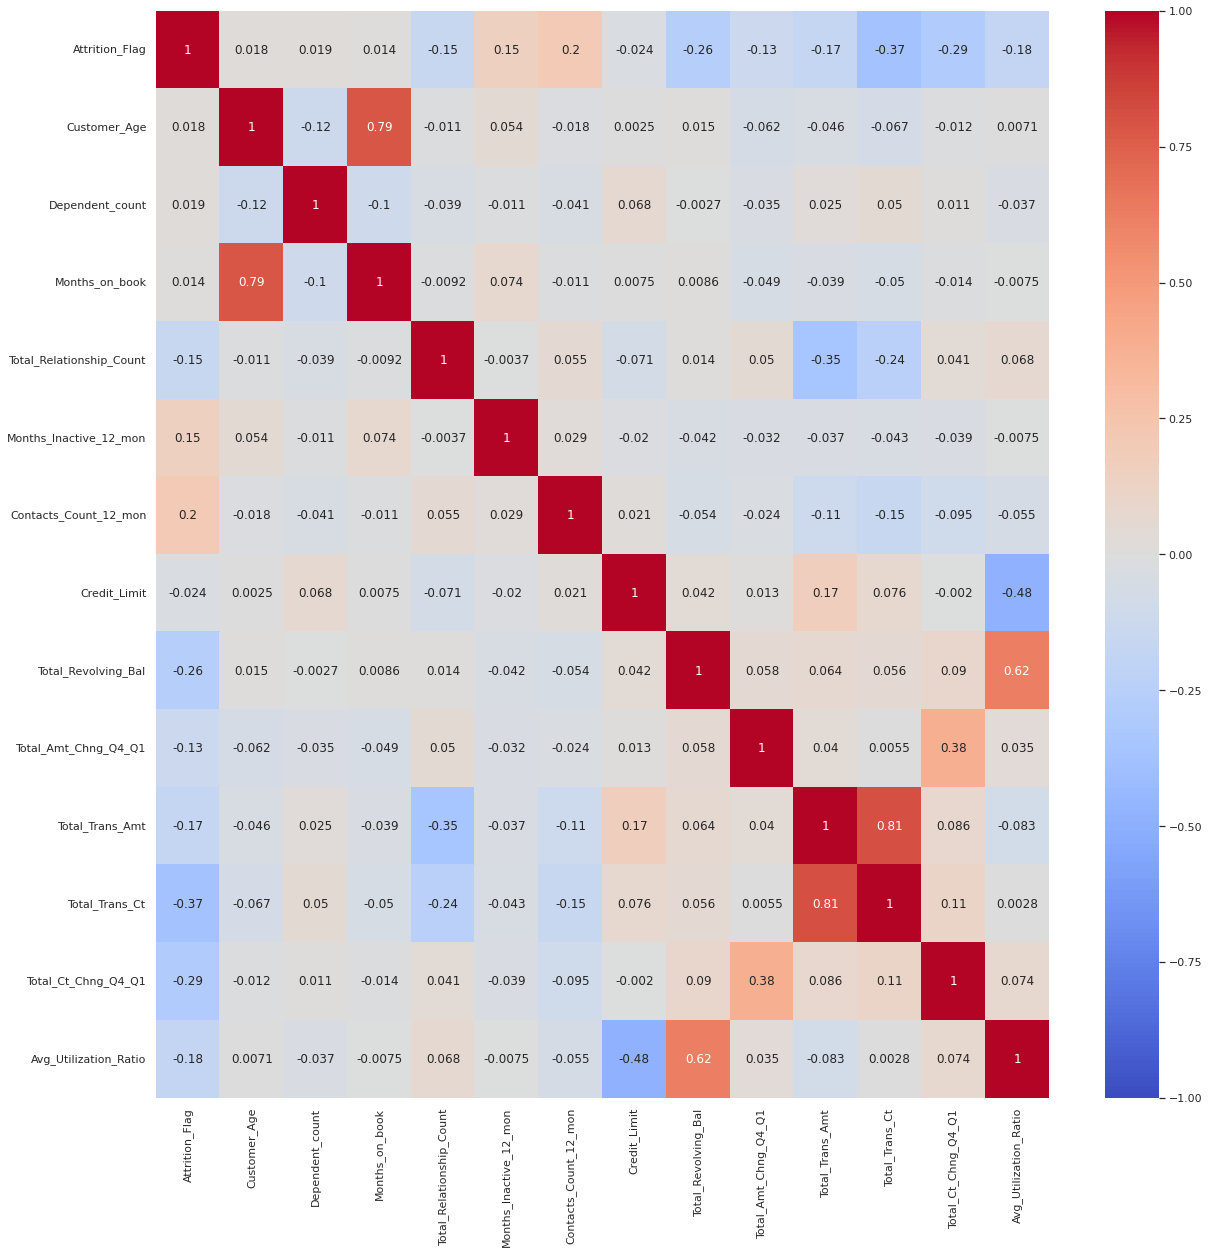

In [8]:
df_plot = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(df_plot, annot=True, vmin=-1.0, vmax=1.0, cmap='coolwarm')
plt.show()

In [9]:
df.values.shape

(10127, 14)

In [10]:
(Y.value_counts()/len(df)*100).round(4)

Existing Customer    83.934
Attrited Customer    16.066
Name: Attrition_Flag, dtype: float64

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 1)

# Análisis Punto 1

Se siguió el siguiente procedimiento para el procesamiento de los datos: 
1.	Se cargan los datos en formato csv a un pandas Dataframe.
2.	Como la variable independiente “Attrition_Flag” viene como una variable categórica se usa el método pd.factorize para convertirla en variable dicotómica.
3.	Se filtran únicamente las variables que son numéricas.
4.	Se renombran unas variables para facilidad de su tratamiento.
5.	Se hace la descripción de las estadísticas principales. 
6.	Se eliminan los valores nulos
Se siguió con el proceso de análisis descriptivo.
1.	Se realizó un análisis por cada variable en relación con las otras variables y segmentando por la variable respuesta. Se observan algunas correlaciones entre algunas variables.
2.	Se realiza el mapa de correlaciones entre las variables. 
3.	Se observan varias variables con correlación perfecta con la variable respuesta, esto quiere decir que tienen un valor de 1 o -1, por lo que se eliminan dichas variables y se elimina la variable “Avg_Open_To_Buy”, ya que tiene correlación perfecta con “Credit_Limit” y esta ultima tiene mayor valor de correlación con la variable respuesta.
4.	Se presentan las variables finales y sus correlaciones.
5.	Se muestra el desbalance de la variable respuesta, donde se tiene que para el valor “Existing Customer” esta presente en 83.9% y el valor “Attrited Custome” solo está presente en un 16.1%, por lo cual cuando se haga el Split entre Train, Val y Test, debe ser estratificado en la variable respuesta.

En conclusión, se cuentan con **10.127** registros con **13** variables dependientes y **1** variable respuesta, con un desbalance del **83.9%** para la categoría más representada.



### 2. Estimación del modelo usando una red neuronal con keras [30 puntos]

Estimen un modelo predictivo usando la muestra de entrenamiento y evalúen su desempeño en test con hiperparámetros de su selección.

Train on 5670 samples, validate on 1418 samples
Epoch 1/15
5670/5670 [==============================] - 1s 143us/sample - loss: 0.6496 - AUC: 0.6914 - val_loss: 0.5446 - val_AUC: 0.8189
Epoch 2/15
5670/5670 [==============================] - 0s 42us/sample - loss: 0.5110 - AUC: 0.8414 - val_loss: 0.4562 - val_AUC: 0.8797
Epoch 3/15
5670/5670 [==============================] - 0s 45us/sample - loss: 0.4446 - AUC: 0.8820 - val_loss: 0.4061 - val_AUC: 0.9050
Epoch 4/15
5670/5670 [==============================] - 0s 42us/sample - loss: 0.4028 - AUC: 0.9043 - val_loss: 0.3723 - val_AUC: 0.9215
Epoch 5/15
5670/5670 [==============================] - 0s 43us/sample - loss: 0.3728 - AUC: 0.9196 - val_loss: 0.3472 - val_AUC: 0.9320
Epoch 6/15
5670/5670 [==============================] - 0s 43us/sample - loss: 0.3500 - AUC: 0.9293 - val_loss: 0.3277 - val_AUC: 0.9394
Epoch 7/15
5670/5670 [==============================] - 0s 41us/sample - loss: 0.3317 - AUC: 0.9360 - val_loss: 0.3124 - val_AUC:

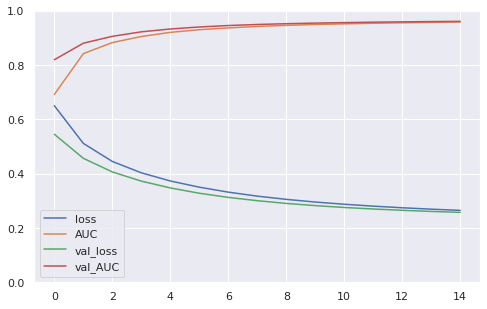

5670/5670 [==============================] - 0s 21us/sample - loss: 0.2623 - AUC: 0.9584
Train AUC: 0.9584321
3039/3039 [==============================] - 0s 22us/sample - loss: 0.2828 - AUC: 0.9503
Test AUC: 0.9503499


In [11]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

y = df['Attrition_Flag']
y = keras.utils.to_categorical(y)
X = df.drop('Attrition_Flag', axis=1).copy()

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential()
model.add(keras.layers.Dense(13, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(2, activation="sigmoid"))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=["AUC"])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train AUC:", train_acc)

test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test AUC:", test_acc)

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 2)

# Análisis Punto 2

Para la construcción del modelo se realizó el siguiente proceso:

1.	Se asigno la variable independe “Attrition_Flag” como y.
2.	La variable y se transformó usando el método keras.utils.to_categorical para que pueda ser interpretada por Keras.
3.	Se asigna a las variables dependientes como X
4.	Se realiza el Split estratificado de los datos, con un maño de test del 30% y del restante el 20% de los datos serán de validación.
5.	Se escalan de forma estándar para facilidades del algoritmo.
6.	Se define la estructura de la red neuronal como una red secuencial de una capa oculta con 13, una neurona por cada variable de entrada con función de activación activación “relu” y se añade la capa de clasificación con función de activación “sigmoid” con dos neuronas, una para cada clase del problema.
7.	Se compila el modelo y usando la función de perdida “binary_crossentropy” ya que es un problema de clasificación binario, se usa de optimizador el gradiente descendiente estocástico “sgd” y la métrica que se definió como evaluación es el “AUC”.
8.	Luego se entrena el modelo y se grafica el rendimiento del modelo para cada epoch.
9.	Se testea en los datos de Test con un AUC del **95.0%**.

En conclusión, para este modelo tan sencillo, de una capa oculta compuesta de 13 neuronas se obtiene un rendimiento del AUC en Train de **95.8** y en Test del **95.0%**. Con lo que no se tiene problemas de sobre ajuste, ya que el comportamiento entre Train y Test es solo del **0.8%**.


### 3. Elección del mejor modelo [40 puntos]

Ahora construyan una función que reciba por parámetro una lista de número de capas a utilizar,  números de neuronas por capa, así como funciones de activación a utilizar.

Dicha función debe entrenar el modelo con los datos de entrenamiento, evaluar con los datos de prueba para cada una de las combinaciones de hiperparámetros y encontrar cuál es la mejor combinación de hiperprámetros.  

Una vez hecho este procedimiento respondan a la siguiente pregunta:
 
¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?

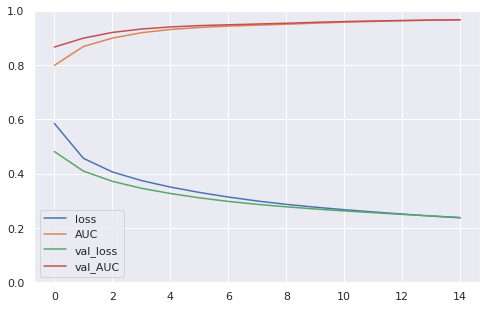

Número de capas: 3
Número de neuronas por capa: 7
Función de activación: relu
Train AUC: 0.96731466
Test AUC: 0.95990336


In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####

def find_best_hyperparameters(layers, neurons, activations, df):

    y = df['Attrition_Flag']
    y = keras.utils.to_categorical(y)
    X = df.drop('Attrition_Flag', axis=1).copy()

    X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,stratify=y, test_size=0.3, random_state=42)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test = scaler.transform(X_test)
    
    best_acc = 0
    best_hyperparameters = None
    history = None
    
    for layer in layers:
        for neuron in neurons:
            for activation in activations:
 
                model = keras.models.Sequential()
                model.add(keras.layers.Dense(neuron, input_dim=X_train.shape[1], activation=activation))
                
                for l in range(layer - 1):
                    model.add(keras.layers.Dense(neuron, activation=activation))
                model.add(keras.layers.Dense(2, activation='sigmoid'))

                model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['AUC'])
                h = model.fit(X_train, y_train, epochs=15, verbose=0, validation_data=(X_valid, y_valid))

                loss, acc = model.evaluate(X_test, y_test, verbose=0)
                if acc > best_acc:
                    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
                    
                    best_acc = acc
                    history = h
                    best_hyperparameters = (layer, neuron, activation, best_acc, train_acc, h)

    return best_hyperparameters

############################################

layers = [2, 3, 4]
neurons = [7, 13, 26]
activations = ['relu', 'softmax', 'sigmoid']

best_hyperparameters = find_best_hyperparameters(layers, neurons, activations, df)

pd.DataFrame(best_hyperparameters[5].history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

print("Número de capas:", best_hyperparameters[0])
print("Número de neuronas por capa:", best_hyperparameters[1])
print("Función de activación:", best_hyperparameters[2])
print("Train AUC:", best_hyperparameters[4])
print("Test AUC:", best_hyperparameters[3])

(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

# Análisis Punto 3

Para desarrollar la función que retorne los mejores hiperparámetros para este problema, se define una función que recibe listas con el número de capas, el número de neuronas y las funciones de activación para estas capas y adicionalmente recibe el Data Frame con las variables. Luego hace el procesamiento anteriormente planteado, se hace Split de datos estratificado para Train, Val y Test. Luego, se estandarizan los datos.

Se itera por cada uno de los hiperparámetros a probar y luego según el número de capas se añaden las necesarias, el siguiente paso es compilar y entrenar el modelo. Cada modelo de las combinaciones posibles se evalúa en set de datos de Test y se guarda el que tenga mayor rendimiento en Test. Luego de probar con todas las combinaciones posibles la función retorna los valores para el mejor modelo y se presenta su evolución y rendimiento. 

La función se testea probando el rendimiento teniendo en cuenta 2, 3 y 4 capas, con 7, 13 y 26 neuronas para las funciones de activación “relu”, “softmax” y “sigmoid”, donde la combinación más optima es una red neuronal con 3 capas con 26 neuronas por cada neurona y con la función de activación “relu”. Este modelo tiene un desempeño de AUC en Train del **96.7%** y en Test del **95.9%**, con una diferencia del **0.8%**, con lo que se puede concluir que no se tiene sobre ajuste.

**¿Cómo argumenta que esta sea la selección óptima de hiperparámetros?**

Como se mostró con esta metodología se obtiene los hiperparámetros que tiene mejor desempeño en el conjunto de datos de Test, estos serían los hiperparámetros óptimos, pero dentro del conjunto de hiperparámetros de las combinaciones posibles que se testearon, es posible que si se define hiperparámetros de forma más fina se encuentren valores con mejor rendimiento.

En **conclusión**, esta metodología sirve para encontrar los hiperparámetros optimos dentro del conjunto de las combinaciones inicialmente definidas para los hiperparámetros.
